In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data Cleaning

In [2]:
carsdata=pd.read_csv('Car details v3.csv')

In [3]:
carsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
#We will use 'selling price', 'year(age)', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine'

In [5]:
#target variable
carsdata['selling_price'] = carsdata['selling_price'] / 1000  #change $ to 1k$

In [6]:
carsdata['age'] = 2020 - carsdata['year']

In [7]:
carsdata['km_driven'] #looks good

0       145500
1       120000
2       140000
3       127000
4       120000
         ...  
8123    110000
8124    119000
8125    120000
8126     25000
8127     25000
Name: km_driven, Length: 8128, dtype: int64

In [8]:
carsdata['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [9]:
carsdata.drop(carsdata[carsdata['fuel'] == 'CNG'].index, axis= 0, inplace=True)
carsdata.drop(carsdata[carsdata['fuel'] == 'LPG'].index, axis= 0, inplace=True)
carsdata['fuel'].value_counts()

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

In [10]:
carsdata['transmission'].value_counts()  #looks good

Manual       6983
Automatic    1050
Name: transmission, dtype: int64

In [11]:
carsdata['owner'].value_counts()  

First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Test Drive Car             5
Name: owner, dtype: int64

In [12]:
carsdata.drop(carsdata[carsdata['owner'] == 'Test Drive Car'].index, axis= 0, inplace=True)
carsdata['owner'] = carsdata['owner'].replace(['Third Owner', 'Fourth & Above Owner'], 'Third & Above Owner')
carsdata['owner'].value_counts() 

First Owner            5238
Second Owner           2073
Third & Above Owner     717
Name: owner, dtype: int64

In [13]:
carsdata['mileage'].value_counts()

18.9 kmpl     225
19.7 kmpl     173
18.6 kmpl     164
21.1 kmpl     157
17.0 kmpl     133
             ... 
16.73 kmpl      1
18.48 kmpl      1
16.09 kmpl      1
11.8 kmpl       1
18.76 kmpl      1
Name: mileage, Length: 366, dtype: int64

In [14]:
carsdata[['mileage', 'kmpl']] = carsdata['mileage'].str.split(" ", expand = True)
carsdata['mileage'].value_counts()

18.9     225
19.7     173
18.6     164
21.1     157
17.0     133
        ... 
18.53      1
15.63      1
14.62      1
11.8       1
16.05      1
Name: mileage, Length: 366, dtype: int64

In [15]:
carsdata['engine'].value_counts()

1248 CC    1017
1197 CC     832
796 CC      432
998 CC      424
2179 CC     389
           ... 
2496 CC       1
2776 CC       1
2446 CC       1
2197 CC       1
1590 CC       1
Name: engine, Length: 121, dtype: int64

In [16]:
carsdata[['engine', 'CC']] = carsdata['engine'].str.split(" ", expand = True)
carsdata['engine'].value_counts()

1248    1017
1197     832
796      432
998      424
2179     389
        ... 
2197       1
2835       1
3498       1
2650       1
1950       1
Name: engine, Length: 121, dtype: int64

In [17]:
#We will use 'age', 'selling price', 'km_driven', 'fuel', 'transmission', 'owner', 'mileage', 'engine'

In [18]:
cars = carsdata[['selling_price', 'age', 'km_driven', 'mileage', 'engine', 'fuel', 'transmission', 'owner']].copy()

In [19]:
cars.isnull().sum()

selling_price      0
age                0
km_driven          0
mileage          214
engine           214
fuel               0
transmission       0
owner              0
dtype: int64

In [20]:
cars =cars.dropna()
cars.info()
cars.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7814 non-null   float64
 1   age            7814 non-null   int64  
 2   km_driven      7814 non-null   int64  
 3   mileage        7814 non-null   object 
 4   engine         7814 non-null   object 
 5   fuel           7814 non-null   object 
 6   transmission   7814 non-null   object 
 7   owner          7814 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 549.4+ KB


selling_price    0
age              0
km_driven        0
mileage          0
engine           0
fuel             0
transmission     0
owner            0
dtype: int64

In [21]:
cars['mileage']=pd.to_numeric(cars['mileage'])
cars['engine']=pd.to_numeric(cars['engine'])
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7814 entries, 0 to 8127
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7814 non-null   float64
 1   age            7814 non-null   int64  
 2   km_driven      7814 non-null   int64  
 3   mileage        7814 non-null   float64
 4   engine         7814 non-null   int64  
 5   fuel           7814 non-null   object 
 6   transmission   7814 non-null   object 
 7   owner          7814 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 549.4+ KB


In [22]:
cars

,selling_price,age,km_driven,mileage,engine,fuel,transmission,owner
0,450.0,6,145500,23.40,1248,Diesel,Manual,First Owner
1,370.0,6,120000,21.14,1498,Diesel,Manual,Second Owner
2,158.0,14,140000,17.70,1497,Petrol,Manual,Third & Above Owner
3,225.0,10,127000,23.00,1396,Diesel,Manual,First Owner
4,130.0,13,120000,16.10,1298,Petrol,Manual,First Owner
...,...,...,...,...,...,...,...,...
8123,320.0,7,110000,18.50,1197,Petrol,Manual,First Owner
8124,135.0,13,119000,16.80,1493,Diesel,Manual,Third & Above Owner
8125,382.0,11,120000,19.30,1248,Diesel,Manual,First Owner
8126,290.0,7,25000,23.57,1396,Diesel,Manual,First Owner


# Check normality and influential points

In [23]:
model =smf.ols('selling_price ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)',data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1146.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:02:07   Log-Likelihood:                -60381.
No. Observations:                7814   AIC:                         1.208e+05
Df Residuals:                    7805   BIC:                         1.208e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         809.2082     88.956      9.097      0.000     634.831     983.585
C(fuel)[T.Petrol]                 -82.8002     17.850     -4.639      0.000    -117.790     -47.810
C(transmission)[T.Manual]        -988.9110     20.473    -48.303      0.000   -1029.043    -948.779
C(owner)[T.Second Owner]          -75.3567     16.020     -4.704      0.000    -106.761     -43.953
C(owner)[T.Third & Above Owner]   -18.0610     25.183     -0.717      0.473     -67.427      31.304
age                               -44.9575      2.210    -20.340      0.000     -49.290     -40.625
km_driven                          -0.0017      0.000    -12.870      0.000      -0.002      -0.001
mileage                            13.5979      2.505      5.429      0.000       8.688      18.508
engine                              0.6019      0.022     26.933      0.000       0.558       0.646
==============================================================================
Omnibus:                     5485.721   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           143728.427
Skew:                           3.035   Prob(JB):                         0.00
Kurtosis:                      23.115   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

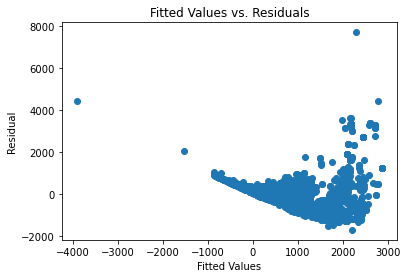

In [24]:
#Fitted Values vs. Residuals Plot
fitted = model.fittedvalues
res = model.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

(array([5.090e+02, 5.901e+03, 1.185e+03, 9.800e+01, 4.100e+01, 7.700e+01,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-1697.65942535,  -757.64571343,   182.3679985 ,  1122.38171042,
         2062.39542234,  3002.40913427,  3942.42284619,  4882.43655812,
         5822.45027004,  6762.46398197,  7702.47769389]),
 <BarContainer object of 10 artists>)

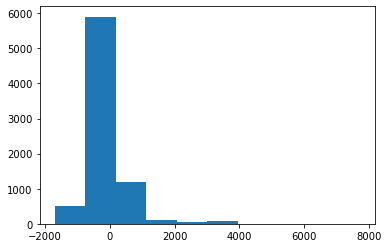

In [36]:
plt.hist(model.resid)

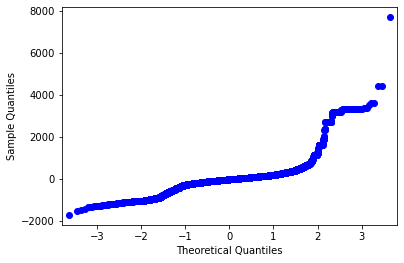

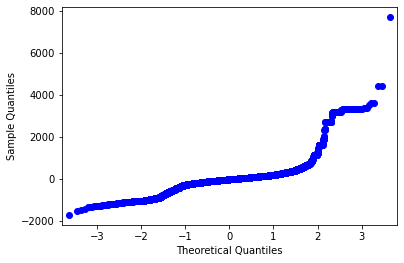

In [37]:
#QQ plot
sm.qqplot(model.resid)

In [52]:
#change Y to lnY

In [53]:
model_1 = smf.ols('np.log(selling_price) ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)', data=cars).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

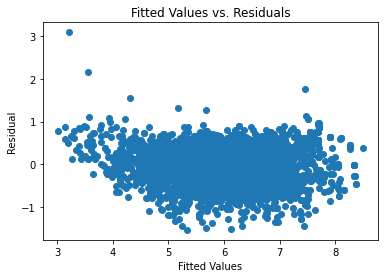

In [54]:
fitted = model_1.fittedvalues
res = model_1.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

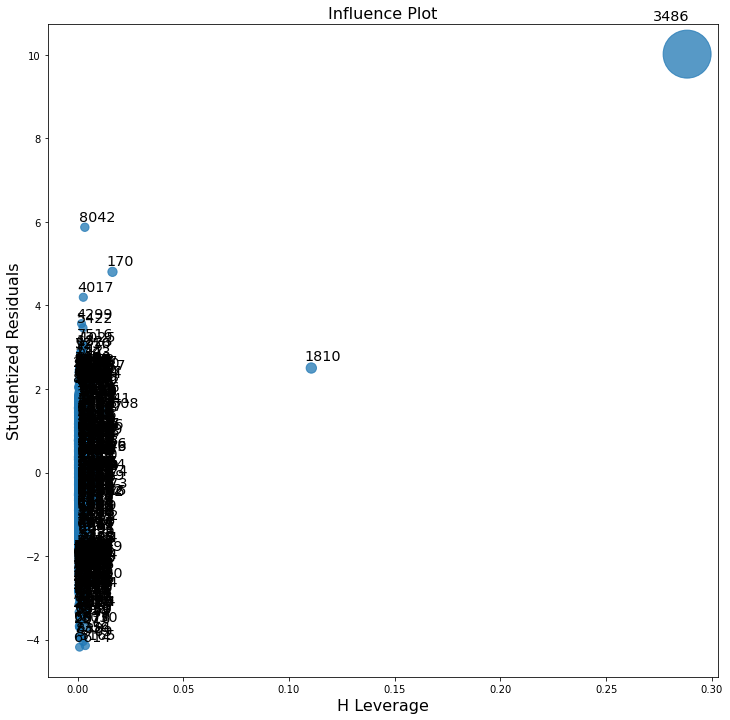

In [40]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model_1,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value
#the points with big size and out of the (-3,3) should raise a flag

In [41]:
#threshold externally studentized residuals
import scipy
n=7814
p=8
inf = model_1.get_influence()
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=inf.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud


print(len(reg_studs[atyp_stud]), cars.index[atyp_stud], reg_studs[atyp_stud])

374 Int64Index([  18,   38,   82,  108,  131,  135,  139,  170,  186,  254,
            ...
            7833, 7872, 7873, 7887, 7930, 8017, 8020, 8030, 8042, 8089],
           dtype='int64', length=374) [ 2.93741578 -2.83129526  2.10168264  2.50637606  2.0255712   2.04458439
  2.62736055  4.80417264  2.25490361 -2.08462543 -2.79915909  2.02651516
 -2.8800244   2.43287365  2.4847103  -2.84906796  2.43287365  2.4847103
 -2.27969941 -2.27969941 -2.79485187 -2.17561302 -2.74823906  2.69258137
 -2.47401573 -2.1192423  -2.19494412 -2.19494412  2.43287365  2.4847103
 -2.21154105 -2.13002666 -2.98374249 -2.19217755 -2.04169475 -3.24056362
 -2.01094263 -2.01516206 -2.01265094 -2.35387737 -2.06242148  2.01531994
 -3.95315028  2.03336022 -2.00378364 -2.4434489  -2.10606011 -2.15560769
 -3.34024675 -1.96257917 -2.03233362  3.01127566  2.43287365  2.4847103
  2.43287365  2.4847103   2.43287365  2.4847103   2.43287365  2.4847103
 -2.95039812 -2.01207935 -2.58400922 -3.33039097 -2.282905   -2.4575495

In [42]:
#Cook's distance
inflsum=inf.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(len(reg_cook[atyp_cook]), cars.index[atyp_cook],reg_cook[atyp_cook])

537 Int64Index([  18,   57,   82,  105,  108,  131,  132,  135,  136,  139,
            ...
            7952, 7967, 7976, 8017, 8020, 8030, 8042, 8057, 8081, 8089],
           dtype='int64', length=537) 18      0.002036
57      0.000562
82      0.000956
105     0.000603
108     0.000726
          ...   
8030    0.006303
8042    0.013048
8057    0.000527
8081    0.000707
8089    0.001603
Name: cooks_d, Length: 537, dtype: float64


In [55]:
#find the points shown in both list
intersection_set = set.intersection(set(cars.index[atyp_stud]), set(cars.index[atyp_cook]))
intersection_list = list(intersection_set)
print(len(intersection_list))

322


In [56]:
#drop those points
carsnew=cars.copy().drop(labels=intersection_list,axis=0)

In [57]:
#use the new dataset to do regression, still change Y to lnY
model_2 =smf.ols('np.log(selling_price) ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)',data=carsnew).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(selling_price)   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     4630.
Date:                   Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                           23:19:44   Log-Likelihood:                -1997.8
No. Observations:                   7492   AIC:                             4014.
Df Residuals:                       7483   BIC:                             4076.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.0232      0.054    111.743      0.000       5.917       6.129
C(fuel)[T.Petrol]                  -0.1482      0.011    -13.775      0.000      -0.169      -0.127
C(transmission)[T.Manual]          -0.4606      0.012    -36.989      0.000      -0.485      -0.436
C(owner)[T.Second Owner]           -0.0796      0.009     -8.436      0.000      -0.098      -0.061
C(owner)[T.Third & Above Owner]    -0.0870      0.015     -5.813      0.000      -0.116      -0.058
age                                -0.1188      0.001    -86.628      0.000      -0.122      -0.116
km_driven                       -1.126e-06      1e-07    -11.212      0.000   -1.32e-06   -9.29e-07
mileage                             0.0125      0.001      8.318      0.000       0.010       0.015
engine                              0.0008   1.35e-05     57.020      0.000       0.001       0.001
==============================================================================
Omnibus:                       98.072   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.282
Skew:                          -0.169   Prob(JB):                     1.65e-17
Kurtosis:                       2.634   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

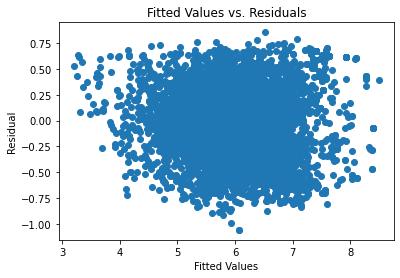

In [59]:
fitted = model_2.fittedvalues
res = model_2.resid
plt.scatter(fitted,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")     #looks good so far

(array([   8.,  110.,  430.,  860., 1286., 1736., 1617.,  966.,  395.,
          84.]),
 array([-1.05997289, -0.86827603, -0.67657917, -0.4848823 , -0.29318544,
        -0.10148858,  0.09020828,  0.28190515,  0.47360201,  0.66529887,
         0.85699574]),
 <BarContainer object of 10 artists>)

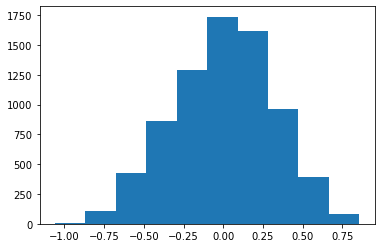

In [60]:
plt.hist(model_2.resid)

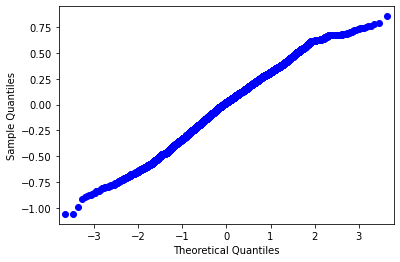

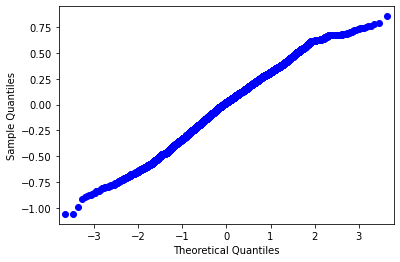

In [61]:
sm.qqplot(model_2.resid)

#### until now, dataset is 'carsnew', model is 'np.log(selling_price) ~ age + km_driven + mileage + engine + C(fuel) + C(transmission) + C(owner)'